# data uploading

In [1]:
#FOR COLAB:
import pandas as pd
import numpy as np
import scipy.io as sio
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(  name=fn, length=len(uploaded[fn])))

Saving Solar+Data+Set.csv to Solar+Data+Set.csv
User uploaded file "Solar+Data+Set.csv" with length 202574 bytes


In [2]:

df = pd.read_csv("Solar+Data+Set.csv")

df.head(32)

,Date,Solar Ir
0,1/1/2019 0:00,0.000000
1,1/1/2019 1:00,0.000000
2,1/1/2019 2:00,0.000000
3,1/1/2019 3:00,0.000000
4,1/1/2019 4:00,0.000000
5,1/1/2019 5:00,0.000000
6,1/1/2019 6:00,0.000000
7,1/1/2019 7:00,0.000000
8,1/1/2019 8:00,0.016447
9,1/1/2019 9:00,0.093861


## univariate lstm

Epoch 1/10
272/272 [==============================] - 20s 16ms/step - loss: 0.0276
Epoch 2/10
272/272 [==============================] - 5s 18ms/step - loss: 0.0071
Epoch 3/10
272/272 [==============================] - 3s 11ms/step - loss: 0.0049
Epoch 4/10
272/272 [==============================] - 3s 10ms/step - loss: 0.0039
Epoch 5/10
272/272 [==============================] - 3s 10ms/step - loss: 0.0030
Epoch 6/10
272/272 [==============================] - 3s 10ms/step - loss: 0.0024
Epoch 7/10
272/272 [==============================] - 3s 12ms/step - loss: 0.0020
Epoch 8/10
272/272 [==============================] - 3s 10ms/step - loss: 0.0019
Epoch 9/10
272/272 [==============================] - 3s 10ms/step - loss: 0.0016
Epoch 10/10
272/272 [==============================] - 3s 10ms/step - loss: 0.0016


1/1 [==============================] - 0s 20ms/step


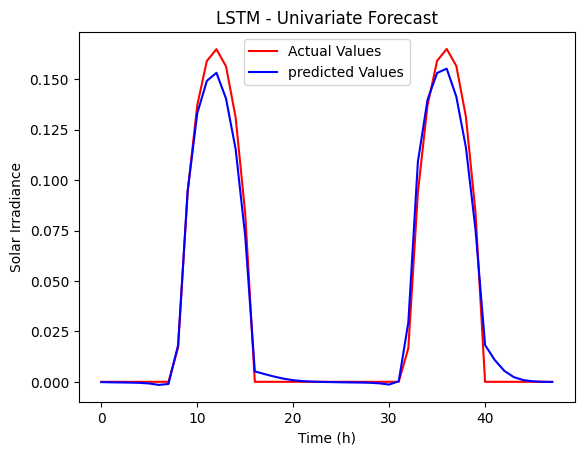

In [3]:
"""
LSTM - uni Variate

"""
# Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv("/Users/rozhinmt/Downloads/Solar+Data+Set.csv")

# df.dropna(inplace=True)



training_set = df.iloc[:8712,1:2].values
test_set = df.iloc[8712:,1:2].values


from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
WS = 24

for i in range(WS, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WS:i, 0:1])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# # Developing LSTM Model

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

Model_P = Sequential()

Model_P.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1],1)))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units = 60, return_sequences = True))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units = 60, return_sequences = True))
Model_P.add(Dropout(0.2))

Model_P.add(LSTM(units = 60))
Model_P.add(Dropout(0.2))

Model_P.add(Dense(units = 1))

Model_P.compile(optimizer = 'adam', loss = 'mean_squared_error')



Model_P.fit(X_train, y_train, epochs = 10, batch_size = 32) # we can change epochs






Model_P.save('LSTM - UniVariat')

from keras.models import load_model
Model_P = load_model('LSTM - UniVariat')




# plt.plot(range(len(Model_P.history.history['loss'])),Model_P.history.history['loss'] )
# plt.xlabel('Epoch Number')
# plt.ylabel('Loss')
# plt.show()


prediction_test = []

Batch_one = training_set_scaled[-WS:]
Batch_New = Batch_one.reshape((1,WS,1))

for i in range(48):

    First_Pred = Model_P.predict(Batch_New)[0]

    prediction_test.append(First_Pred)

    Batch_New = np.append(Batch_New[:,1:,:], [[First_Pred]], axis = 1)


prediction_test = np.array(prediction_test)

predictions = sc.inverse_transform(prediction_test)


plt.plot(test_set, color = 'red', label = 'Actual Values')
plt.plot(predictions, color = 'blue', label = 'predicted Values')
plt.title('LSTM - Univariate Forecast')
plt.xlabel('Time (h)')
plt.ylabel('Solar Irradiance')
plt.legend()
plt.show()

import math

from sklearn.metrics import mean_squared_error

RMSE = math.sqrt(mean_squared_error(test_set, predictions))

from sklearn.metrics import r2_score

Rsquare = r2_score(test_set, predictions)










































In [4]:
# Model_P.history['loss']

In [5]:
# Model_P.fite()

Epoch 1/3
272/272 [==============================] - 10s 10ms/step - loss: 0.0020
Epoch 2/3
272/272 [==============================] - 3s 10ms/step - loss: 0.0016
Epoch 3/3
272/272 [==============================] - 3s 11ms/step - loss: 0.0016


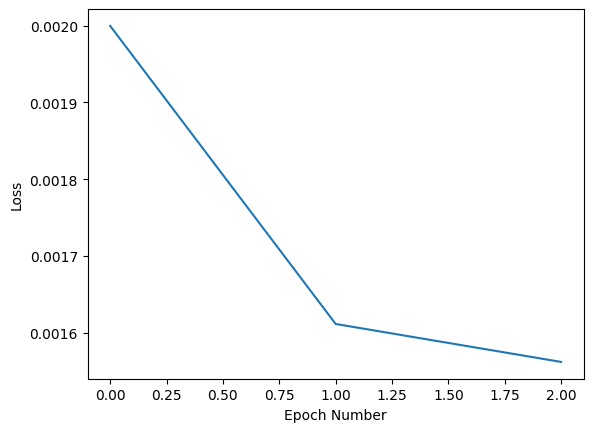

In [6]:
import pickle

# Train model and save history
history = Model_P.fit(X_train, y_train, epochs=3, batch_size=32)#, return_history=True)
with open('history.pickle', 'wb') as f:
    pickle.dump(history.history, f)

# Load model and history
Model_P = load_model('LSTM - UniVariat')
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)

# Plot history
plt.plot(range(len(history['loss'])), history['loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

## multivariate lstm

In [7]:
#FOR COLAB:
import pandas as pd
import numpy as np
import scipy.io as sio
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(  name=fn, length=len(uploaded[fn])))

Saving Electricity+Consumption.csv to Electricity+Consumption.csv
User uploaded file "Electricity+Consumption.csv" with length 323921 bytes


In [8]:

df2 = pd.read_csv("Electricity+Consumption.csv")

df2.head(32)

,DATE,Humidity,Temperature,Electricity
0,2020-01-01 00:00:00 EST,92,-1.1,914
1,2020-01-01 01:00:00 EST,92,-1.5,887
2,2020-01-01 02:00:00 EST,91,-1.5,865
3,2020-01-01 03:00:00 EST,88,-1.1,852
4,2020-01-01 04:00:00 EST,87,-1.3,852
5,2020-01-01 05:00:00 EST,88,-1.1,870
6,2020-01-01 06:00:00 EST,88,-0.9,902
7,2020-01-01 07:00:00 EST,89,-0.9,921
8,2020-01-01 08:00:00 EST,90,-0.9,940
9,2020-01-01 09:00:00 EST,92,-0.9,975


<ipython-input-11-1e840d76151d>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr())


Epoch 1/80
272/272 [==============================] - 11s 12ms/step - loss: 0.0138
Epoch 2/80
272/272 [==============================] - 3s 10ms/step - loss: 0.0060
Epoch 3/80
272/272 [==============================] - 3s 10ms/step - loss: 0.0056
Epoch 4/80
272/272 [==============================] - 3s 10ms/step - loss: 0.0051
Epoch 5/80
272/272 [==============================] - 3s 11ms/step - loss: 0.0045
Epoch 6/80
272/272 [==============================] - 3s 11ms/step - loss: 0.0039
Epoch 7/80
272/272 [==============================] - 3s 10ms/step - loss: 0.0034
Epoch 8/80
272/272 [==============================] - 3s 10ms/step - loss: 0.0028
Epoch 9/80
272/272 [==============================] - 3s 10ms/step - loss: 0.0023
Epoch 10/80
272/272 [==============================] - 3s 12ms/step - loss: 0.0020
Epoch 11/80
272/272 [==============================] - 3s 10ms/step - loss: 0.0018
Epoch 12/80
272/272 [==============================] - 3s 10ms/step - loss: 0.0015
Epoch 13/80


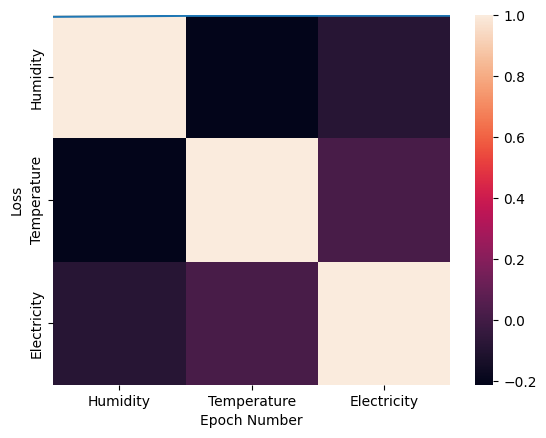

1/1 [==============================] - 0s 20ms/step


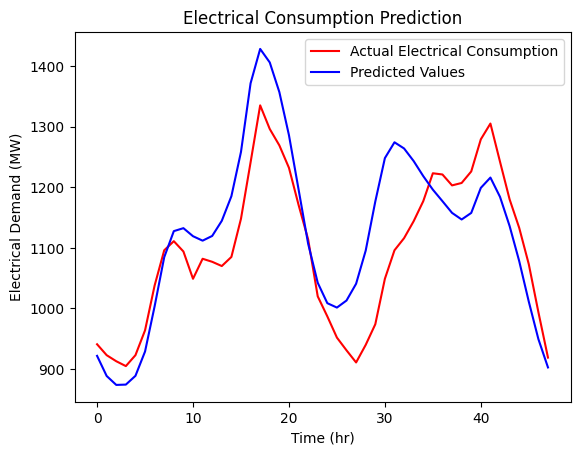

In [11]:
"""
LSTM - MultiVariate

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DATA Reference: https://www.ieso.ca/power-data

# df = pd.read_csv('Electricity Consumption.csv')



df = df2.copy()
df.dropna(inplace=True)


import seaborn as sn
sn.heatmap(df.corr())

training_set = df.iloc[:8712, 1:4].values
test_set = df.iloc[8712:, 1:4].values

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))

training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

test_set_scaled = test_set_scaled[:, 0:2]

X_train = []
y_train = []
WS = 24

for i in range(WS, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WS:i, 0:3])
    y_train.append(training_set_scaled[i,2])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 3))

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


Model = Sequential()

Model.add(LSTM(units = 70, return_sequences = True, input_shape = (X_train.shape[1], 3)))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70, return_sequences = True))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70, return_sequences = True))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 70))
Model.add(Dropout(0.2))

Model.add(Dense(units = 1))

Model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model.fit(X_train,y_train, epochs = 80, batch_size = 32)

plt.plot(range(len(Model.history.history['loss'])), Model.history.history['loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

Model.save('LSTM - Multivariate')

from keras.models import load_model
Model = load_model('LSTM - Multivariate')

prediction_test = []

Batch_one = training_set_scaled[-24:]
Batch_New = Batch_one.reshape((1,24,3))

for i in range(48):

    First_pred = Model.predict(Batch_New)[0]

    prediction_test.append(First_pred)

    New_var = test_set_scaled[i,:]

    New_var = New_var.reshape(1,2)

    New_test = np.insert(New_var, 2, [First_pred], axis =1)

    New_test = New_test.reshape(1,1,3)

    Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)

prediction_test = np.array(prediction_test)



# invers scaling
SI = MinMaxScaler(feature_range = (0,1))
y_Scale = training_set[:,2:3]
SI.fit_transform(y_Scale)

predictions = SI.inverse_transform(prediction_test)

real_values = test_set[:, 2]

plt.plot(real_values, color = 'red', label = 'Actual Electrical Consumption')
plt.plot(predictions, color = 'blue', label = 'Predicted Values')
plt.title('Electrical Consumption Prediction')
plt.xlabel('Time (hr)')
plt.ylabel('Electrical Demand (MW)')
plt.legend()
plt.show()

import math
from sklearn.metrics import mean_squared_error
RMSE = math.sqrt(mean_squared_error(real_values,predictions))


def mean_absolute_percentage_error (y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

MAPE = mean_absolute_percentage_error(real_values,predictions)
















